# Image Analysis

This notebook shows some simple examples of basic image analysis techniques.

Although the code should be roughly self-explanatory, please read along with these slides (INSERT SLIDES) for a better grasp of the concepts.


# Introduction

Image analysis is an umbrella term for various methods and tools for manipulating and extracting information from images. There are fairly sophisticated algorithms like CNNs which would be difficult to cover in an introduction, but even these techniques build on some simple tools, such as segmentation and feature detection. I'll cover some of the basic tools in hopes that you'll be able to tackle more advanced techniques with the right vocabulary.


# Topics

- Structure of image data
- Segmentation
  - Thresholding
  - Clustering
  - Edges...
- Feature detection
  - Edge detection
  - Corner detection
  - Ridge detection


# Structure of Image Data

If you don't have Pillow yet...

    ! pip install --user Pillow

Height, width, and # of channels:  (649, 960, 3)


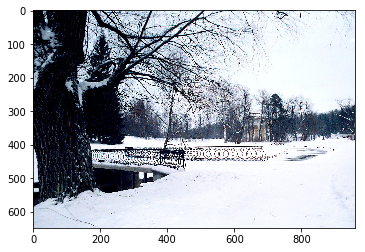

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('Pavlovsk_bridge.png')
img_array = np.asarray(img).copy()      # Convert image object to numpy array so we can inspect the data

# PIL offers some basic image analysis tools, but I'll use numpy for the examples here
# because you'll probably have to do most heavy lifting through numpy anyway

print "Height, width, and # of channels: ", img_array.shape

plt.imshow(img_array)
plt.show()

# Thresholding

### Thresholding by hand


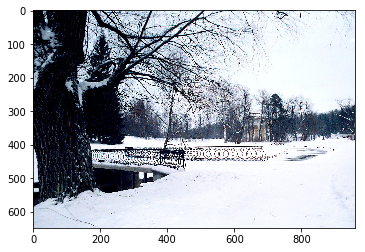

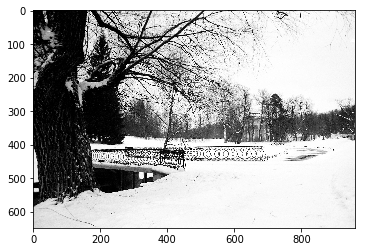

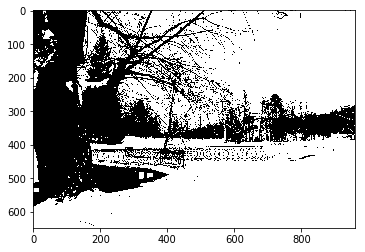

In [2]:
img = Image.open('Pavlovsk_bridge.png')


# Below is how you'd do this with Pillow

if False:
    img.show()  # Warning: displays image by opening your OS's default image viewing software
    img_gray = img.convert('L')     # Converts to grayscale using the Luma transform 
                                    # (we just want to segment on how "bright" the pixels are)
                                    # https://en.wikipedia.org/wiki/Grayscale#Luma_coding_in_video_systems
    img_thresh = img_gray.point(lambda x: 0 if x<128 else 255, '1')
                                    # Segments image using threshold value of 128
    img_thresh.show()
    
    
# Now the numpy way

img_arr = np.asarray(img).copy()
plt.imshow(img_arr)
plt.show()

img_gray = np.mean( img_arr, 2)     # Convert to grayscale by taking the average of RGB values
plt.imshow(img_gray, cmap='gray')
plt.show()

# Pixel range is 0...255, 256/2 = 128
img_thresh = img_gray
img_thresh[img_gray < 128] = 0    # Black
img_thresh[img_gray >= 128] = 255 # White

plt.imshow(img_thresh, cmap='gray')
plt.show()


# Adapted from https://stackoverflow.com/questions/18777873/convert-rgb-to-black-or-white
# I stole the example image from wikipedia (https://en.wikipedia.org/wiki/Thresholding_(image_processing)). 
# It's kind of a bad example because the image already has high contrast but I'm running with it. Forgive me.

### Now let's pick a threshold automatically... with Otsu Thresholding

If you don't have skimage...

    ! pip install --user scikit-image

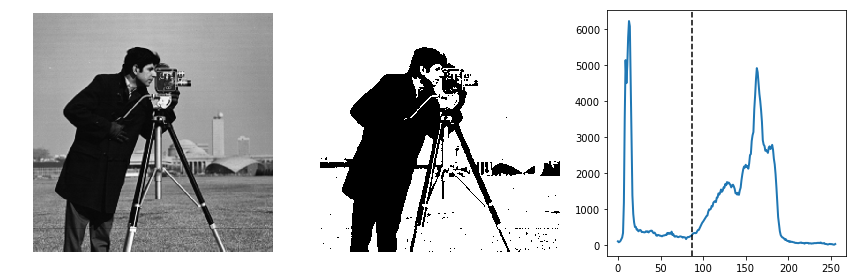

In [38]:
import matplotlib.pyplot as plt
from skimage import data, io
from skimage import filters
from skimage import exposure

if True:
    img = data.camera()            # scikit-image's example
else:
    img = io.imread('houses.jpg')  # wikipedia's example
    
val = filters.threshold_otsu(img)
hist, bins_center = exposure.histogram(img)

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(img, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(img > val, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.plot(bins_center, hist, lw=2)
plt.axvline(val, color='k', ls='--')

plt.tight_layout()
plt.show()

# Mostly ripped from http://www.scipy-lectures.org/packages/scikit-image/auto_examples/plot_threshold.html
# See also https://en.wikipedia.org/wiki/Otsu%27s_method

# Edge Detection

### Canny edge detector

OpenCV has built in functions for doing edge detection. Below you can see how Canny() finds points in the image with high gradients.

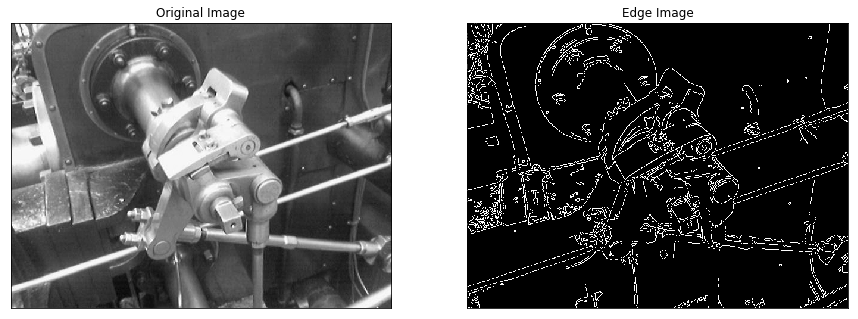

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('Valve_original.PNG',0)
edges = cv2.Canny(img,50,200)

plt.figure(figsize=(15,8))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

Alternatively...

Here's a custom-made Canny edge detector so you can see what's happening under the hood

### Vertical and horizontal features

If you don't have opencv:

    ! pip install --user opencv-python
    
Note - this is an unofficial wrapper for opencv

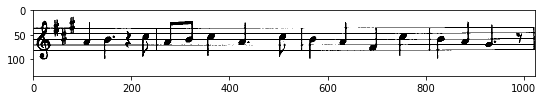

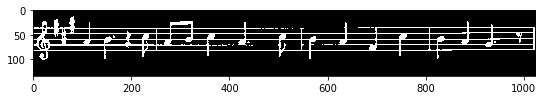

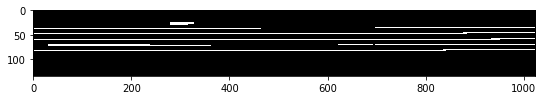

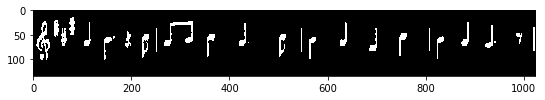

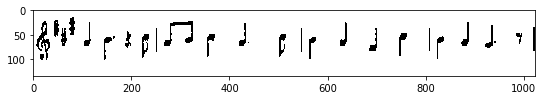

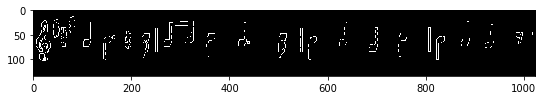

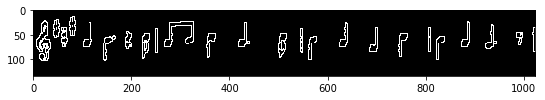

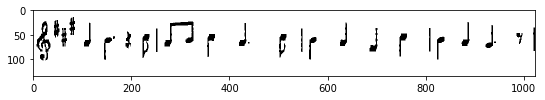

0

In [1]:
"""
Copied from openCV tutorial at 
https://docs.opencv.org/trunk/dd/dd7/tutorial_morph_lines_detection.html
"""
import numpy as np
import matplotlib.pyplot as plt
import sys
import cv2
def show_wait_destroy(winname, img):
    if False:
        cv2.imshow(winname, img)
        cv2.moveWindow(winname, 500, 0)
        cv2.waitKey(0)
        cv2.destroyWindow(winname)
    else:
        plt.figure(figsize=(9,4))
        plt.imshow(img, cmap='gray')
        plt.show()
            
def main(argv):
    # [load_image]
    # Check number of arguments
    if len(argv) < 1:
        print ('Not enough parameters')
        print ('Usage:\nmorph_lines_detection.py < path_to_image >')
        return -1
    # Load the image
    src = cv2.imread(argv[0], cv2.IMREAD_COLOR)
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image: ' + argv[0])
        return -1
    # Show source image
    cv2.imshow("src", src)
    # [load_image]
    # [gray]
    # Transform source image to gray if it is not already
    if len(src.shape) != 2:
        gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    else:
        gray = src
    # Show gray image
    show_wait_destroy("gray", gray)
    # [gray]
    # [bin]
    # Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
    gray = cv2.bitwise_not(gray)
    bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                                cv2.THRESH_BINARY, 15, -2)
    # Show binary image
    show_wait_destroy("binary", bw)
    # [bin]
    # [init]
    # Create the images that will use to extract the horizontal and vertical lines
    horizontal = np.copy(bw)
    vertical = np.copy(bw)
    # [init]
    # [horiz]
    # Specify size on horizontal axis
    cols = horizontal.shape[1]
    horizontal_size = cols / 30
    # Create structure element for extracting horizontal lines through morphology operations
    horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
    # Apply morphology operations
    horizontal = cv2.erode(horizontal, horizontalStructure)
    horizontal = cv2.dilate(horizontal, horizontalStructure)
    # Show extracted horizontal lines
    show_wait_destroy("horizontal", horizontal)
    # [horiz]
    # [vert]
    # Specify size on vertical axis
    rows = vertical.shape[0]
    verticalsize = rows / 30
    # Create structure element for extracting vertical lines through morphology operations
    verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, verticalsize))
    # Apply morphology operations
    vertical = cv2.erode(vertical, verticalStructure)
    vertical = cv2.dilate(vertical, verticalStructure)
    # Show extracted vertical lines
    show_wait_destroy("vertical", vertical)
    # [vert]
    # [smooth]
    # Inverse vertical image
    vertical = cv2.bitwise_not(vertical)
    show_wait_destroy("vertical_bit", vertical)
    '''
    Extract edges and smooth image according to the logic
    1. extract edges
    2. dilate(edges)
    3. src.copyTo(smooth)
    4. blur smooth img
    5. smooth.copyTo(src, edges)
    '''
    # Step 1
    edges = cv2.adaptiveThreshold(vertical, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                                cv2.THRESH_BINARY, 3, -2)
    show_wait_destroy("edges", edges)
    # Step 2
    kernel = np.ones((2, 2), np.uint8)
    edges = cv2.dilate(edges, kernel)
    show_wait_destroy("dilate", edges)
    # Step 3
    smooth = np.copy(vertical)
    # Step 4
    smooth = cv2.blur(smooth, (2, 2))
    # Step 5
    (rows, cols) = np.where(edges != 0)
    vertical[rows, cols] = smooth[rows, cols]
    # Show final result
    show_wait_destroy("smooth - final", vertical)
    # [smooth]
    return 0

main(['src.png'])